In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('E:\work\DataSets\Combined_DS_v10.csv')

In [3]:
df.head()

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,South Africa,NaN,Git,21,13,Male,NaN
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,Sweeden,7.0,Git;Subversion,38,9,Male,"70,841.00"
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,No,Sweeden,8.0,Git,45,11,NaN,NaN
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Yes,Sweeden,NaN,Zip file back-ups,46,12,Male,"21,426.00"
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,UK,8.0,Git,39,7,Male,"£41,671.00"


In [4]:
df.dtypes

SurveyDate                     object
FormalEducation                object
ConvertedSalary               float64
Hobby                          object
Country                        object
StackOverflowJobsRecommend    float64
VersionControl                 object
Age                             int64
Years Experience                int64
Gender                         object
RawSalary                      object
dtype: object

In [43]:
df.shape

(999, 11)

<h3>Dealing with missing values</h3>

In [27]:
df.isnull().sum()

SurveyDate                      0
FormalEducation                 0
ConvertedSalary               334
Hobby                           0
Country                         0
StackOverflowJobsRecommend    512
VersionControl                  0
Age                             0
Years Experience                0
Gender                        306
RawSalary                     334
dtype: int64

<h4>Filling categorical missing values</h4>

In [4]:
# Replace missing values
df['Gender'].fillna(value='Not Given',inplace=True)

# Print the count of each value
print(df['Gender'].value_counts())

Male                                                                         632
Not Given                                                                    306
Female                                                                        53
Transgender                                                                    2
Female;Male                                                                    2
Male;Non-binary. genderqueer. or gender non-conforming                         1
Female;Male;Transgender;Non-binary. genderqueer. or gender non-conforming      1
Female;Transgender                                                             1
Non-binary. genderqueer. or gender non-conforming                              1
Name: Gender, dtype: int64


<h4>Filling continuous missing values</h4>

In [6]:
# Fill missing values with the mean
df['ConvertedSalary'].fillna(df['ConvertedSalary'].mean(), inplace=True)

# Round the StackOverflowJobsRecommend values
df['ConvertedSalary'] = round(df['ConvertedSalary'])

# Print the top 5 rows
print(df['ConvertedSalary'].head())

0    92565.0
1    70841.0
2    92565.0
3    21426.0
4    41671.0
Name: ConvertedSalary, dtype: float64


In [7]:
# Fill missing values with the mean
df['StackOverflowJobsRecommend'].fillna(df['StackOverflowJobsRecommend'].mean(), inplace=True)

# Round the StackOverflowJobsRecommend values
df['StackOverflowJobsRecommend'] = round(df['StackOverflowJobsRecommend'])

# Print the top 5 rows
print(df['StackOverflowJobsRecommend'].head())

0    7.0
1    7.0
2    8.0
3    7.0
4    8.0
Name: StackOverflowJobsRecommend, dtype: float64


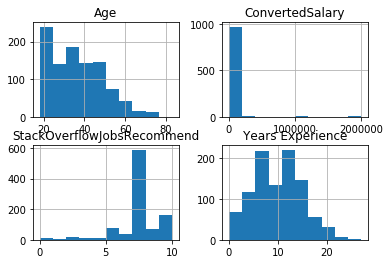

In [62]:
df.hist()
plt.show()

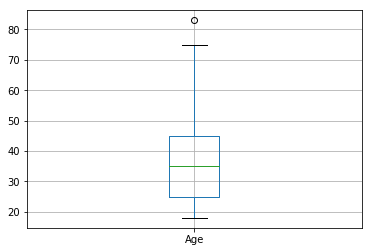

In [8]:
# Create a boxplot of two columns
df[['Age']].boxplot()
plt.show()

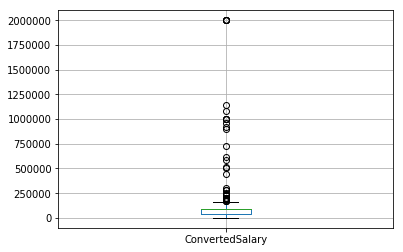

In [9]:
df[['ConvertedSalary']].boxplot()
plt.show()

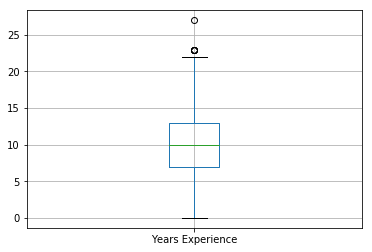

In [10]:
df[['Years Experience']].boxplot()
plt.show()

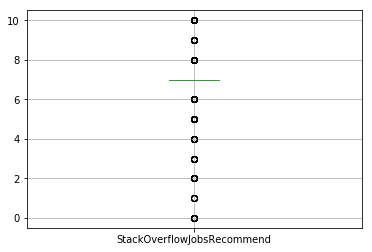

In [11]:
df[['StackOverflowJobsRecommend']].boxplot()
plt.show()

In [54]:
df.describe()

,ConvertedSalary,StackOverflowJobsRecommend,Age,Years Experience
count,9.990000e+02,999.000000,999.000000,999.000000
mean,9.256511e+04,7.030030,36.003003,9.961962
std,1.705864e+05,1.829698,13.255127,4.878129
min,0.000000e+00,0.000000,18.000000,0.000000
25%,4.164150e+04,7.000000,25.000000,7.000000
50%,9.000000e+04,7.000000,35.000000,10.000000
75%,9.256500e+04,7.000000,45.000000,13.000000
max,2.000000e+06,10.000000,83.000000,27.000000


for Age column
Q1=25 Q3=45, IQR=20, Q1-1.5IQR=-5 , Q3+1.5IQR=75 ,so we have outlier in age column

for Years Experience column
Q1=7 Q3=13, IQR=6, Q1-1.5IQR=-2 , Q3+1.5IQR=22 ,so we have outlier in Years Experience column


for StackOverflowJobsRecommend column Q1=7 Q3=7, IQR=0, Q1-1.5IQR=7 , Q3+1.5IQR=7 ,so we have outlier in StackOverflowJobsRecommend column

for ConvertedSalary column Q1=4.16e+04, Q3=9.25e+04, IQR=5.9e+04, Q1-1.5IQR=-0.4e+04 , Q3+1.5IQR=18.1e+04 ,so we have outlier in ConvertedSalary column

<h4>standardization</h4>

In [55]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
SS_scaler = StandardScaler()

# Fit SS_scaler to the data
SS_scaler .fit(df[['Age']])

# Transform the data using the fitted scaler
df['Age'] = SS_scaler .transform(df[['Age']])



     Age_MM  Age
0  0.046154   21
1  0.307692   38
2  0.415385   45
3  0.430769   46
4  0.323077   39


C:\Users\sara\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


<h4>Log transformation</h4>

In [66]:
# Import PowerTransformer
from sklearn.preprocessing import PowerTransformer

# Instantiate PowerTransformer
pow_trans = PowerTransformer()

# Train the transform on the data
df['ConvertedSalary']=pow_trans.fit(df[['ConvertedSalary']]).transform(df[['ConvertedSalary']])


In [67]:
df['ConvertedSalary']

0      0.409123
1      0.120777
2      0.409123
3     -0.992503
4     -0.406802
         ...   
994    0.409123
995   -0.071904
996   -0.137988
997    0.409123
998    3.801086
Name: ConvertedSalary, Length: 999, dtype: float64

In [70]:

# Train the transform on the data
df['StackOverflowJobsRecommend']=pow_trans.fit(df[['StackOverflowJobsRecommend']]).transform(df[['StackOverflowJobsRecommend']])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000228B1312898>,
      dtype=object)

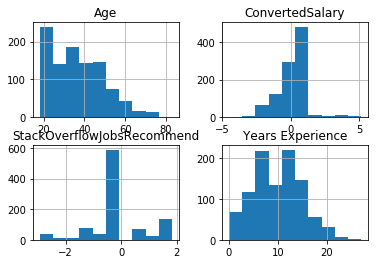

In [71]:
df.hist()

<h4>Dealing with stray characters</h4>

In [14]:
# Remove the commas in the column
df['RawSalary'] = df['RawSalary'].str.replace(',', '')

In [15]:
numeric_vals = pd.to_numeric(df['RawSalary'], errors='coerce')
idx =numeric_vals.isnull()
print(df['RawSalary'][idx])

0           none
2           none
4      £41671.00
6           none
8           none
         ...    
990         none
992         none
994         none
996    $55000.00
997         none
Name: RawSalary, Length: 506, dtype: object


In [16]:
# Replace the offending characters
df['RawSalary'] = df['RawSalary'].str.replace('£','')
# Replace the offending characters
df['RawSalary'] = df['RawSalary'].str.replace('$','')
df['RawSalary'] = pd.to_numeric(df['RawSalary'], errors='coerce')

<h3>Dealing with uncommon categories and  one hot encoding </h3>

Some features can have many different categories but a very uneven distribution of their occurrences.In these cases, you may not want to create a feature for each value, but only the more common occurrences.
To use categorical variables in a machine learning model, you first need to represent them in a quantitative way( one hot encoding )

In [14]:
# Create a series out of the Country column
countries = df['Country']

# Get the counts of each category
country_counts = countries.value_counts()

In [15]:
country_counts

South Africa    166
USA             164
Spain           134
Sweeden         119
France          115
Russia           97
UK               95
India            95
Ukraine           9
Ireland           5
Name: Country, dtype: int64

In [16]:
mask = countries.isin(country_counts[country_counts < 10].index)
# Label all other categories as Other
countries[mask] = 'Other'

# Print the updated category counts
print(pd.value_counts(countries))

South Africa    166
USA             164
Spain           134
Sweeden         119
France          115
Russia           97
UK               95
India            95
Other            14
Name: Country, dtype: int64


C:\Users\sara\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
# Convert the Country column to a one hot encoded Data Frame
one_hot_encoded_country = pd.get_dummies(countries, columns=['Country'], prefix='OH',drop_first=True)
df=pd.concat([df,one_hot_encoded_country],axis=1)
df.drop('Country',axis=1,inplace=True)

In [18]:
df.columns

Index(['SurveyDate', 'FormalEducation', 'ConvertedSalary', 'Hobby',
       'StackOverflowJobsRecommend', 'VersionControl', 'Age',
       'Years Experience', 'Gender', 'RawSalary', 'OH_India', 'OH_Other',
       'OH_Russia', 'OH_South Africa', 'OH_Spain', 'OH_Sweeden', 'OH_UK',
       'OH_USA'],
      dtype='object')

<h3>Binarizing columns</h3>

we  wanted to binarize a column. In dataset we have a large number of survey respondents that are working voluntarily (without pay). we created a new column titled Paid_Job indicating whether each person is paid (their salary is greater than zero).

In [19]:
df['Paid_Job'] = 0

# Replace all the Paid_Job values where ConvertedSalary is > 0
df.loc[df['ConvertedSalary'] > 0, 'Paid_Job'] = 1

# Print the first five rows of the columns
print(df[['Paid_Job', 'ConvertedSalary']].head())

   Paid_Job  ConvertedSalary
0         1          92565.0
1         1          70841.0
2         1          92565.0
3         1          21426.0
4         1          41671.0


<h3>Binning values</h3>

For many continuous values we  care less about the exact value of a numeric column, but instead care about the bucket it falls into. This can be useful when plotting values, or simplifying your machine learning models. It is mostly used on continuous variables where accuracy is not the biggest concern e.g. age, height, wages.

In [20]:
# Bin the continuous variable ConvertedSalary using these boundaries
df['boundary_binned'] = pd.cut(df['ConvertedSalary'], 
                                         bins= [-np.inf, 10000, 50000, 100000, 150000, np.inf] , 
                                         labels= ['Very low', 'Low', 'Medium', 'High', 'Very high'])

# Print the first 5 rows of the boundary_binned column
print(df[['boundary_binned', 'ConvertedSalary']].head())


  boundary_binned  ConvertedSalary
0          Medium          92565.0
1          Medium          70841.0
2          Medium          92565.0
3             Low          21426.0
4             Low          41671.0


<h3>Statistical outlier removal</h3>

A commonly used alternative approach is to remove data that sits further than three standard deviations from the mean. You can implement this by first calculating the mean and standard deviation of the relevant column to find upper and lower bounds, and applying these bounds as a mask to the DataFrame. This method ensures that only data that is genuinely different from the rest is removed, and will remove fewer points if the data is close together.

In [17]:
std = df['ConvertedSalary'].std()
mean =df['ConvertedSalary'].mean()

# Calculate the cutoff
cut_off = std * 3
lower, upper = mean - cut_off, mean+cut_off

# Trim the outliers
trimmed_df = df[(df['ConvertedSalary'] < upper)& (df['ConvertedSalary'] > lower)]


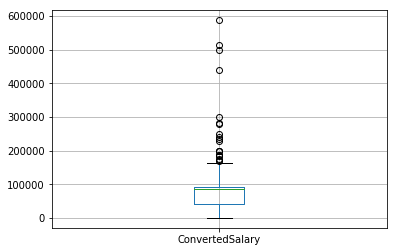

In [18]:
trimmed_df[['ConvertedSalary']].boxplot()
plt.show()

<h3>Percentage based outlier removal


    
One way to ensure a small portion of data is not having an overly adverse effect is by removing a certain percentage of the largest and/or smallest values in the column. This can be achieved by finding the relevant quantile and trimming the data using it with a mask. 

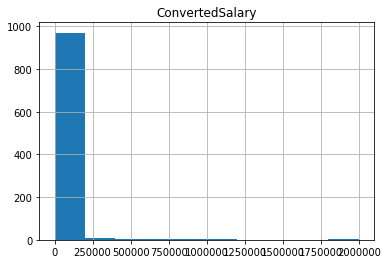

<Figure size 432x288 with 0 Axes>

In [22]:
quantile = df['ConvertedSalary'].quantile(0.95)
# Trim the outliers
trimmed_df =df[df['ConvertedSalary'] < quantile]
# The original histogram
df[['ConvertedSalary']].hist()
plt.show()
plt.clf()